# Multidimensional Kernel Density Estimates (KDEs):

This notebook is for people to familiarize themselves with the visualization of multidimensional KDEs. The example datasets are randomly generated sets of 2d (i.e., (y,x)) or 3d (i.e., (z,y,x)) points (pythonic order of dimensions).

In [1]:
from __future__ import division, print_function
import os
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def two_var_kde(x, y, sampling = 100j):
    
    '''Parameters:
       -----------
       
       x:        1-d array containing positional information along one axis
       y:        1-d array containing positional information along a second axis 
       sampling: determines grid step-size for uniformly sampling the range of values in x and y
                 (default =100j).
       
       Returns:
       --------
       
       xx:        sampled grid positions along x
       yy:        sampled grid positions along y
       f:         the evaluated kernel density estimate over (xx,yy)
       f_rescale: normalizes f by its range for contour visualization purposes
       
       '''
    
    xmin, xmax = (np.amin(x), np.amax(x))
    ymin, ymax = (np.amin(y), np.amax(y))
    
    xx, yy = np.mgrid[xmin:xmax:sampling, ymin:ymax:sampling]
    
    positions = np.vstack([xx.ravel(), yy.ravel()])
    kernel = st.gaussian_kde(np.vstack((x,y)))
    
    f = np.reshape(kernel(positions).T, xx.shape)
    f_rescale = (f - np.amin(f)) / (np.amax(f) - np.amin(f))
    
    return xx, yy, f, f_rescale

In [3]:
def plot_2d_kde(xx, yy, f_rescale, axis_lims, cmap = 'Purples', line_col = 'k', figsize = (3,3), save_path = os.getcwd()):
    
    '''Parameters:
       -----------
       
       xx:        sampled grid positions for the kde along one axis
       yy:        sampled grid positions for the kde along the second axis
       f_rescale: kde output normalized for best contour visualization
       axis_lims: (min, max) for x and y plot axes
       cmap:      color map for matplotlib filled contour map plotting function
                  (default = 'Purples')
       line_col:  color matplotlib line contour map plotting function
                  (default = 'black')
       figsize:   size of output plot for notebook visualization and saving
                  (default = (3in, 3in))
       save_path: file path for saving countour plot output
                  (defualt is the current working directory)
                  
       Returns:
       --------
       
       there is no explicit variable output for this function.
       
       an .svg file displaying a filled contour map of kde values 
       is saved to the current working directory by default.'''
    
    xmin, xmax, ymin, ymax = axis_lims
    
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot('111')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    
    cfset = ax.contourf(xx, yy, f_rescale, cmap='Purples')
    cset = ax.contour(xx, yy, f_rescale, colors='k')
    
    # Label plot
    ax.clabel(cset, inline=1, fontsize=12)
    ax.set_xlabel('$x$ (px)', fontsize = 12)
    plt.xticks(fontsize = 12)
    ax.set_ylabel('$y$ (px)', fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.tight_layout()
    
    plt.savefig(os.path.join(save_path, '2d_kde_plot.svg'))
    plt.show()
    
    return

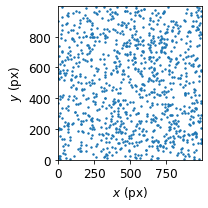

In [4]:
# generate random data

x = np.random.randint(0,1000, size = (1000))
y = np.random.randint(0,1000, size = (1000))

# pull out axis limits for plotting results

xmin, xmax = (np.amin(x), np.amax(x))
ymin, ymax = (np.amin(y), np.amax(y))
axis_lims = (xmin, xmax, ymin, ymax)

# visualize input

plt.figure(figsize = (3,3))
plt.scatter(x,y, s = 2)

plt.xlabel('$x$ (px)', fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlim(xmin, xmax)

plt.ylabel('$y$ (px)', fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim(ymin, ymax)

plt.tight_layout()
plt.show()

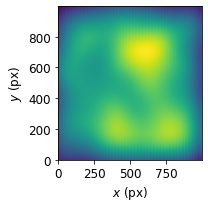

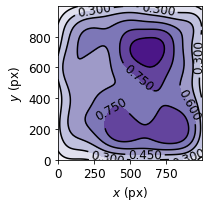

In [5]:
# calculate and return 2d kde

xx, yy, f, f_rescale = two_var_kde(x, y)

# plot kde values of entire field of view

plt.figure(figsize = (3,3))
plt.scatter(xx, yy, c=f_rescale)

plt.xlabel('$x$ (px)', fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlim(xmin, xmax)

plt.ylabel('$y$ (px)', fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim(ymin, ymax)
plt.tight_layout()
plt.show()

# plot results with contours (this plot is saved as an .svg file)

plot_2d_kde(xx, yy, f_rescale, axis_lims)